In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly as py
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import plotly.subplots as sp
import warnings
warnings.filterwarnings("ignore")
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) #SHOWING ALL COLUMNS
admission=pd.read_excel("Admission 2019 Data for ISB Campus.xlsx",header=[1])
#DROPPING USELESS COLUMNS, AND RENAMING COLUMNS FOR EASE
admission.drop(['STATUS_ID','STATUS','NU_TEST_CENTER','DEGREE_STATUS'],axis=1,inplace=True)
admission.rename(columns={'Ist': 'Campus_1','2nd': 'Campus_2','3rd': 'Campus_3','4th': 'Campus_4',
                        'Ist.1': 'Discipline_1','2nd.1': 'Discipline_2','3rd.1': 'Discipline_3','4th.1': 'Discipline_4',
                         'Board': 'Board_ssc','Degree': 'Degree_ssc','Total': 'Total_ssc','Obtained': 'Obtained_ssc',
                         'Board.1': 'Board_fsc','Degree.1': 'Degree_fsc','Total.1': 'Total_fsc','Obtained.1': 'Obtained_fsc',
                         'BBA': 'NU_TEST_BBA','BS': 'NU_TEST_BS','Total.2': 'SAT1_Total','Obtained.2': 'SAT1_Obtained',
                         'Total.3': 'SAT2_Total','Obtained.3': 'SAT2_Obtained','BBA/BS(AF)': 'NU_Merit_BBA/BS(AF)',
                         'BS.1': 'NU_Merit_BS','Campus': 'NTS_Admission_Offer_Campus',
                         'Discipline': 'NTS_Admission_Offer_Discipline',
                         'Campus.1': 'NU_Admission_Offer_Campus','Discipline.1': 'NU_Admission_Offer_Discipline',
                         'Campus.2': 'Admission_Campus','Discipline.2': 'Admission_Discipline'},inplace=True, errors='raise')
admission.columns= admission.columns.str.lower() #Converting cols to lower case for ease
admission.dropna(subset=['nts_marks', 'nu_test_bba','nu_test_bs','sat1_obtained','sat2_obtained'],
                 how='all',inplace=True) #Dropping rows where applicant did not give
                                         #any entry kind of entry test e.g sat,nts,nu
admission['admission_discipline'].fillna(-1, inplace=True)#Assuming NaN values in admission_discipline column
                                                          #is what degree applicants god admission in, replacing NaN with -1
                                                          #to make it easier to compute results in future
admission

,l,city,campus_1,campus_2,campus_3,campus_4,discipline_1,discipline_2,discipline_3,discipline_4,board_ssc,degree_ssc,total_ssc,obtained_ssc,board_fsc,degree_fsc,total_fsc,obtained_fsc,nts_marks,nu_test_bba,nu_test_bs,sat1_total,sat1_obtained,sat2_total,sat2_obtained,nts merit marks,nu_merit_bba/bs(af),nu_merit_bs,nts_admission_offer_campus,nts_admission_offer_discipline,nu_admission_offer_campus,nu_admission_offer_discipline,admission_campus,admission_discipline
3,1900007,Peshawar,PWR,NaN,NaN,NaN,BS(EE),BS(CS),NaN,NaN,Federal,SSC,1050.0,802.0,Federal,HSSC (I+II),1100.0,802.0,NaN,NaN,30.291665,NaN,NaN,NaN,NaN,NaN,NaN,51.87,NaN,NaN,PWR,BS(EE),NaN,-1
4,1900008,Islamabad,ISB,NaN,NaN,NaN,BS(CS),NaN,NaN,NaN,Federal,SSC,1050.0,728.0,Federal,HSSC (I+II),1100.0,728.0,78.0,NaN,47.187499,NaN,NaN,NaN,NaN,66.91,NaN,51.50,NaN,NaN,NaN,NaN,NaN,-1
6,1900011,Faisalabad,CFD,NaN,NaN,NaN,BS(CS),BS(SE),NaN,NaN,Faislabad,SSC,1100.0,957.0,Faislabad,HSSC-I,520.0,957.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
7,1900012,Nowshera,ISB,NaN,NaN,NaN,BS(AI),BS(CS),NaN,NaN,Cambridge,O-Level,900.0,709.0,NaN,NaN,NaN,709.0,NaN,NaN,59.673610,NaN,NaN,NaN,NaN,NaN,NaN,65.29,NaN,NaN,ISB,BS(AI),ISB,BS(AI)
8,1900012,Nowshera,ISB,NaN,NaN,NaN,BS(AI),BS(CS),NaN,NaN,Cambridge,O-Level,900.0,709.0,NaN,NaN,NaN,709.0,NaN,NaN,59.673610,NaN,NaN,NaN,NaN,NaN,NaN,65.29,NaN,NaN,ISB,BS(AI),ISB,BS(CS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26362,1932881,Vehari,CFD,NaN,NaN,NaN,BS(EE),NaN,NaN,NaN,Multan,SSC,1100.0,928.0,Multan,HSSC (I+II),1100.0,928.0,NaN,NaN,27.069444,NaN,NaN,NaN,NaN,NaN,NaN,47.90,NaN,NaN,NaN,NaN,NaN,-1
26363,1932883,Faisalabad,CFD,NaN,NaN,NaN,BBA,NaN,NaN,NaN,Faislabad,SSC,1100.0,913.0,Faislabad,HSSC-I,510.0,913.0,NaN,25.041674,NaN,NaN,NaN,NaN,NaN,NaN,41.93,NaN,NaN,NaN,NaN,NaN,NaN,-1
26365,1932902,Rawalpindi,ISB,NaN,NaN,NaN,BS(CS),NaN,NaN,NaN,Federal,SSC,1050.0,986.0,Federal,HSSC (I+II),1100.0,986.0,NaN,NaN,31.076385,NaN,NaN,NaN,NaN,NaN,NaN,54.95,NaN,NaN,NaN,NaN,NaN,-1
26369,1932906,Lahore,ISB,NaN,NaN,NaN,BS(CS),NaN,NaN,NaN,Cambridge,O-Level,900.0,720.0,Cambridge,A-Level,1100.0,720.0,NaN,NaN,41.847224,NaN,NaN,NaN,NaN,NaN,NaN,58.42,NaN,NaN,NaN,NaN,CFD,BS(CS)


# Question 1. Do the students performing good in Matric/O-level exam have a better chance of getting admission in NUCES?

#### Assuming performing good = Obtaining 80% marks in Matric/O-level

In [3]:
adm=admission[admission['admission_discipline']!=-1] #Filtering out only those applicants which got admission in FAST      
good=adm[(adm['obtained_ssc']/adm['total_ssc'])*100>=80].shape[0] #Count of only those that got admission in FAST,
                                                                  #who got good marks in Matric/O-Level
bad=adm.shape[0]-good #Count of only those that got admission in FAST, who did not get good marks in Matric/O-Level
data=[good,bad]

fig = go.Figure(data=[go.Pie(labels=['Good Marks in Matric/O-Level','Average Marks in Matric/O-Level'], values=data,
                             title="Students who got admission in FAST, separated by Matric/O-Level results")])
fig.show()

### As Evidenced by the above Pie Chart, students who performed good in Matric/O-Levels generally had a better chance of getting admission in FAST NUCES, as 71.7% of the applicants who secured admission had good marks in Matric/O-Levels, while only 28.3% of applicants who got admission in FAST NUCES did not have good marks in Matric/O-Levels

###### Assuming Good Marks in Matric/O-Levels = >=80% Marks

<br><br><br>

# Question 2. Do the students performing good in FSC/A-level exam have a better chance of getting admission in NUCES?
###### Assumption:- Since F.Sc. marks data is wrong in the provided .xlsx file (as it is an exact copy of S.Sc. marks), we can derive the F.Sc. marks from the applicants NU Merit. In 2019, NUCES used the following formula for calculating a students merit: 50% weightage to NU Test, 40% weightage to F.Sc. marks, and 10% weightage to S.Sc. marks. Since we have a students NU Merit, we can use this to derive an applicants F.Sc. marks
###### Assuming performing good = Obtaining 80% marks in FSC/A-Level

In [4]:
def fun(bs,bba): #Function to map nu bba vals to NaN bs vals
    if np.isnan(bs):
        return bba
    else:
        return bs
    

fsc=admission[['total_ssc','obtained_ssc','nu_test_bs','nu_test_bba','nu_merit_bba/bs(af)',
               'nu_merit_bs','admission_discipline']].copy()
fsc.dropna(subset=['nu_test_bs','nu_test_bba'],how='all',inplace=True) #Dropping those applicants who didnt give any NU Test
fsc['ssc']=(fsc['obtained_ssc']/fsc['total_ssc'])*100
fsc['nu_test'] = fsc.apply(lambda x: fun(x['nu_test_bs'],x['nu_test_bba']),axis=1) #Mapping nu test values, if bs test column 
                                                                                   #is null, we take bba test column instead
fsc['nu_merit'] = fsc.apply(lambda x: fun(x['nu_merit_bs'],x['nu_merit_bba/bs(af)']),axis=1) #Mapping nu test values, if bs test
                                                                                             #column is null, we take bba test
                                                                                             #column instead
fsc.drop(['nu_test_bba','nu_test_bs','nu_merit_bs','nu_merit_bba/bs(af)','obtained_ssc','total_ssc'],axis=1,inplace=True)
fsc['fsc']=abs(((10*fsc['nu_merit'])-(5*fsc['nu_test'])-fsc['ssc'])/(4))#Deriving F.Sc results from the formula that NUCES uses,
                                                                        #50% to NU Test, 40% to F.Sc, 10% to S.Sc

    
fsc=fsc[fsc['admission_discipline']!=-1] #Filtering out only those applicants which got admission in FAST      
good=fsc[fsc['fsc']>=80].shape[0] #Count of only those that got admission in FAST, who got good marks in FSC/A-Level
bad=fsc.shape[0]-good #Count of only those that got admission in FAST, who did not get good marks in FSC/A-Level
data=[good,bad]

fig = go.Figure(data=[go.Pie(labels=['Good Marks in FSC/A-Level','Average Marks in FSC/A-Level'], values=data,
                             title="Students who got admission in FAST, separated by FSC/A-Level results")])
fig.show()

### As Evidenced by the above Pie Chart, students who performed good in FSC/A-Level did not have a better chance in getting admission in FAST NUCES, as 72.4% of the applicants who secured admission had average mars in FSC/A-Level (<80% marks), while only 27.6% of applicants who got admission in FAST NUCES had good marks in FSC/A-Level
###### Since F.Sc. marks data is wrong in the provided .xlsx file (as it is an exact copy of S.Sc. marks), we can derive the F.Sc. marks from the applicants NU Merit. In 2019, NUCES used the following formula for calculating a students merit: 50% weightage to NU Test, 40% weightage to F.Sc. marks, and 10% weightage to S.Sc. marks. Using this, we can derive an applicants F.Sc. marks
###### Assuming Good Marks in Matric/O-Levels = >=80% Marks

<br><br><br>

# Question 3. Do the students who could not get the first preference of their choice of discipline failed to join NUCES?

In [5]:
discipline=admission.copy()
discipline=discipline[['l','discipline_1','nts_admission_offer_discipline','nu_admission_offer_discipline',
                       'admission_discipline']]
discipline.dropna(subset=['discipline_1'],how='all',inplace=True) #Dropping those who didnt specify a 1st campus preference
discipline.dropna(subset=['nu_admission_offer_discipline','nts_admission_offer_discipline'],
                  how='all',inplace=True) #Only looking at applicants who secured admission in some discipline

discipline = discipline[(discipline['nu_admission_offer_discipline']!=discipline['discipline_1'])
             & (discipline['nts_admission_offer_discipline']!=discipline['discipline_1'])] #FILTERING OUT THOSE WHO GOT OFFER
                                                                                           #IN DISCIPLINE OTHER THAN THEIR
                                                                                           ##MAIN ONE
    
admission_count=discipline[discipline['admission_discipline']!=-1].shape[0]
not_admission_count=discipline[discipline['admission_discipline']==-1].shape[0]

fig = go.Figure(data=[go.Pie(labels=['Did not get admission','Got Admission'], values=data,hole=0.5,title="Didn't get 1st choice discipline")])
fig.show()

### As evidenced by the above Pie Chart, a majority of applicants who could not secure admission in their first choice of discipline (but secured admission in some other discipline), opted to get admission in FAST NUCES

<br><br><br>

# Question 4. Students who have passed the NTS exam instead of the NU test have a better chance of joining NUCES

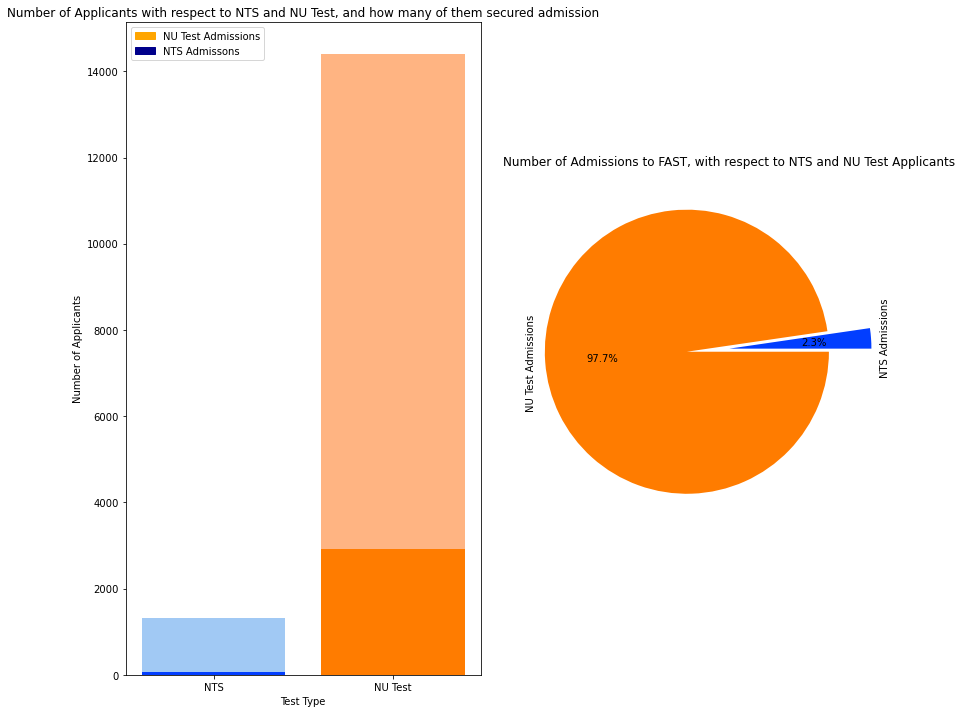

In [6]:
nts=admission[['nts_marks','nu_test_bs','nu_test_bba','admission_discipline']].copy()
nts.dropna(subset=['nts_marks','nu_test_bs','nu_test_bba'],how='all',inplace=True) 
nts['nts_marks'].fillna(-1,inplace=True)
nts['nu_test_bs'].fillna(-1,inplace=True)
nts['nu_test_bba'].fillna(-1,inplace=True)

only_nts=nts[(nts['nts_marks']!=-1) & ((nts['nu_test_bs']==-1) & (nts['nu_test_bba']==-1))]
nu_test=nts[nts['nts_marks']==-1]

nts_adm=only_nts[only_nts['admission_discipline']!=-1].shape[0]
nuc_adm=nu_test[nu_test['admission_discipline']!=-1].shape[0]

plt.figure(figsize=(14, 12))
plt.subplot(121)
colors = sns.color_palette('bright')[0:2]
colors1 = sns.color_palette('pastel')[0:2]
total=[only_nts.shape[0],nu_test.shape[0]]
bar1=plt.bar(['NTS','NU Test'],total,color=colors1)
total=[nts_adm,nuc_adm]
bar2=plt.bar(['NTS','NU Test'],total,color=colors)
bar1 = mpatches.Patch(color='orange', label='NU Test Admissions')
bar2 = mpatches.Patch(color='darkblue', label='NTS Admissons')
plt.legend(handles=[bar1, bar2])
plt.xlabel("Test Type")
plt.ylabel("Number of Applicants")
plt.title("Number of Applicants with respect to NTS and NU Test, and how many of them secured admission")

plt.subplot(122)
data = [nts_adm,nuc_adm]
labels = ['NTS Admissions','NU Test Admissions']
colors = sns.color_palette('bright')[0:2]
pie2=plt.pie(data, labels = labels, colors=colors,explode=(0,0.3), autopct='%.1f%%')
plt.title("Number of Admissions to FAST, with respect to NTS and NU Test Applicants")
plt.setp(pie2[1], rotation_mode="anchor", ha="center", va="center")
for tx in pie2[1]:
    rot = tx.get_rotation()
    tx.set_rotation(rot+270+(1-rot//180)*180)
plt.show()

### As shown by the above graphics, Students who have passed NTS exam instead of NU Test do not have a better chance of joining NUCES. The bar chart shows the total number of applicants of both NTS and NU Test, and how many of them managed to secure admission. As can be seen in the graph, the number of applicants who managed to secure admission after giving NTS is very low (~5%), while the number of applicants who secured admission after giving NU Test was significantly higher (20%)

### Similarly, the Pie Chart displays the total number of applicants who joined NUCES, divided by people who got in through NU Test and NTS. An overwhelming majority (~97%) of the applicants passed the NU Exam instead of NTS, while only around 2% of the applicants got in through NTS

<br><br><br>

# Question 5. Which BS program is a popular choice for admission (campus wise analysis required)

#### Assumption of popular = Most admissions

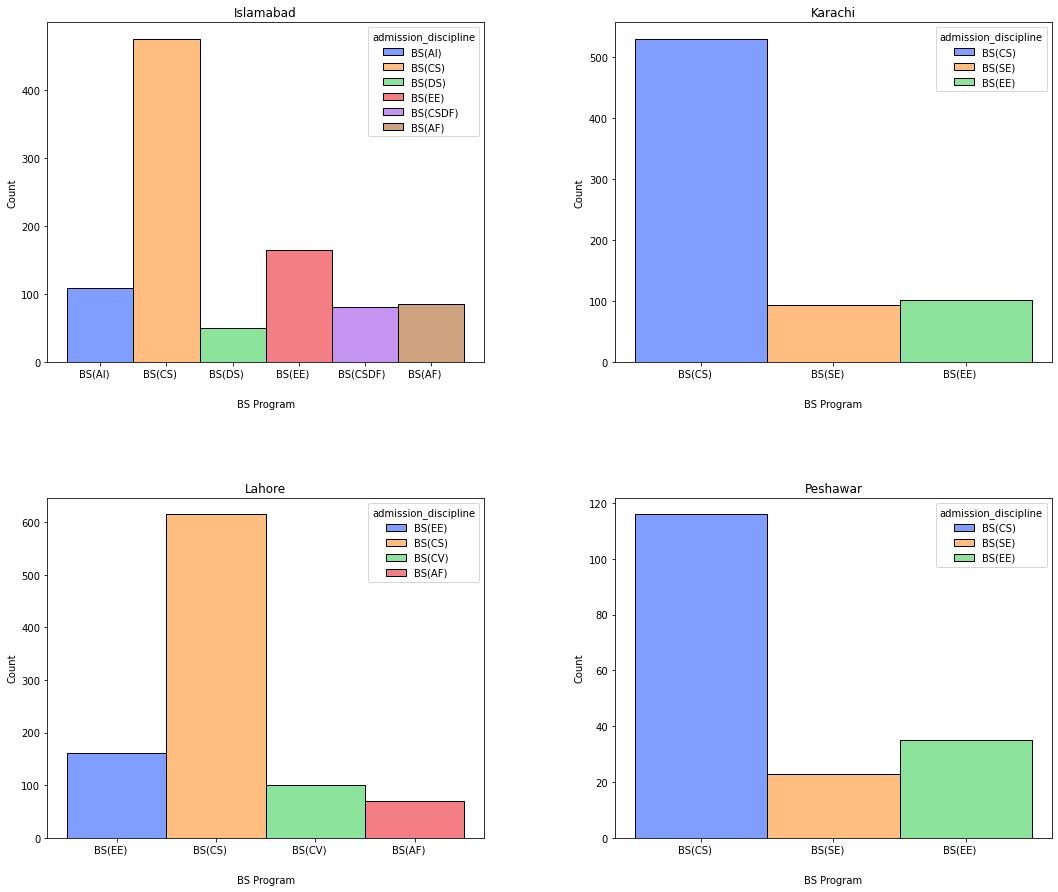

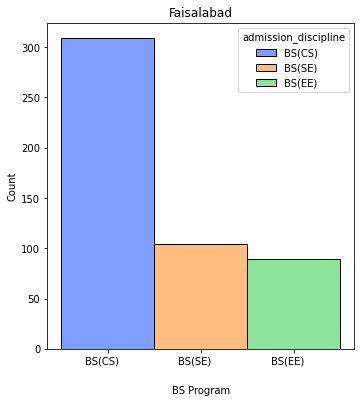

In [7]:
popular=admission[['admission_campus','admission_discipline']]
popular.dropna(subset=['admission_campus','admission_discipline'],how='any',inplace=True) 
popular=popular[~popular.admission_discipline.str.contains("BBA", na=False)] #DROPPING BBA, AS WE ARE ONLY INTERESTED IN 
                                                                             #BS PROGRAMS
popular['admission_discipline'].iplot(kind='hist',barmode='stack',bargap=0.1,
                                      title="Admission Count of BS Programs (All Campuses)",
                                      xTitle='BS Program', yTitle='Count')
fig, axes = plt.subplots(2, 2,figsize=(18,15))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
palette=sns.color_palette('bright')
sns.histplot(ax=axes[0,0], x='admission_discipline',data=popular[popular['admission_campus']=='ISB'],hue='admission_discipline',
             palette=palette[0:6])
sns.histplot(ax=axes[0,1], x='admission_discipline',data=popular[popular['admission_campus']=='KHI'],hue='admission_discipline',
            palette=palette[0:3])
sns.histplot(ax=axes[1,0], x='admission_discipline',data=popular[popular['admission_campus']=='LHR'],hue='admission_discipline',
            palette=palette[0:4])
sns.histplot(ax=axes[1,1], x='admission_discipline',data=popular[popular['admission_campus']=='PWR'],hue='admission_discipline',
            palette=palette[0:3])
axes[0,0].set_xlabel("BS Program",labelpad=20)
axes[0,1].set_xlabel("BS Program",labelpad=20)
axes[1,0].set_xlabel("BS Program",labelpad=20)
axes[1,1].set_xlabel("BS Program",labelpad=20)
axes[0,0].set_title("Islamabad")
axes[0,1].set_title("Karachi")
axes[1,0].set_title("Lahore")
axes[1,1].set_title("Peshawar")
fig, axes = plt.subplots(figsize=(5.5,6))
axes.set_xlabel("BS Program",labelpad=20)
axes.set_title("Faisalabad")
sns.histplot(x='admission_discipline',data=popular[popular['admission_campus']=='CFD'],hue='admission_discipline',
            palette=palette[0:3]);

###### Assumption of popular = Most admissions
### As shown by the graphs, BS(CS) is the most popular program for all campuses for admission in FAST NUCES, in 2019. I did not take into account the BBA program, as I was only required to see the popularity of BS programs.
### The first bar graph shows the admission count of all disciplines of all Campuses, where it is evident that BS(CS) enjoys a substantial lead over the rest of the degree programs.
### The subplots show campus wise admissions of BS Programs, where again BS(CS) enjoys a considerable lead over all the other BS Programs (more than 100%  in all cases).

<br><br><br>

# Question 6. Is there any correlation between the Matric/O-level/F.Sc./A-Level and the NU test score? (Students with the NTS test score can be ignored here)


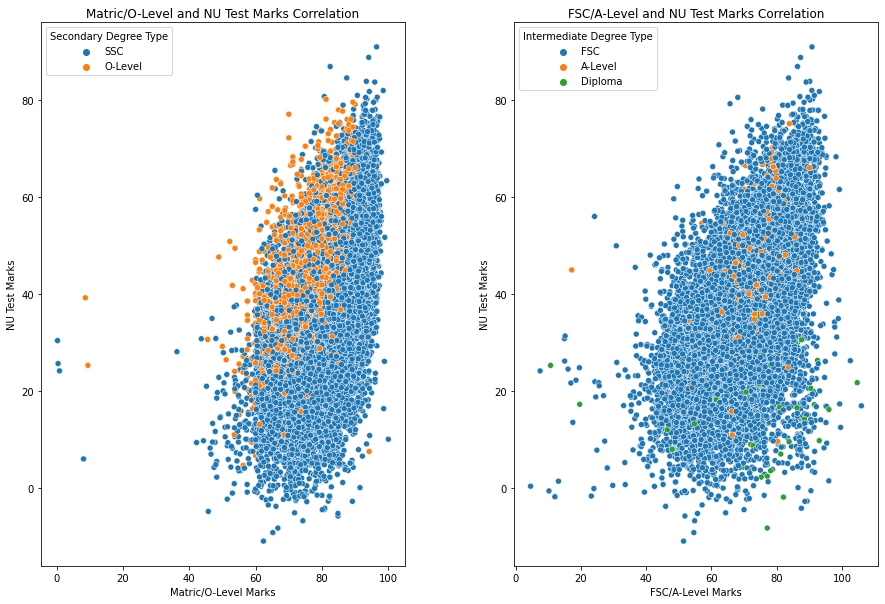

In [8]:
def fun(bs,bba): #Function to map nu bba vals to NaN bs vals
    if np.isnan(bs):
        return bba
    else:
        return bs
    

corr=admission[['total_ssc','obtained_ssc','nu_test_bs','nu_test_bba','nu_merit_bba/bs(af)',
               'nu_merit_bs','degree_ssc','degree_fsc']].copy()
corr.replace(['HSSC-I','HSSC (I+II)'], 'FSC',inplace=True)
corr.dropna(subset=['nu_test_bs','nu_test_bba'],how='all',inplace=True) #Dropping those applicants who didnt give any NU Test
corr['ssc']=(corr['obtained_ssc']/corr['total_ssc'])*100
corr['nu_test'] = corr.apply(lambda x: fun(x['nu_test_bs'],x['nu_test_bba']),axis=1) #Mapping nu test values, if bs test column 
                                                                                     #is null, we take bba test column instead
corr['nu_merit'] = corr.apply(lambda x: fun(x['nu_merit_bs'],x['nu_merit_bba/bs(af)']),axis=1)#Mapping nu test values, 
                                                                                              #if bs test column is null,
                                                                                              #we take bba test column instead
corr['fsc']=abs(((10*corr['nu_merit'])-(5*corr['nu_test'])-corr['ssc'])/(4)) #Deriving F.Sc results from the formula that NUCES uses,
                                                                    #50% to NU Test, 40% to F.Sc, 10% to S.Sc
corr.drop(['nu_test_bba','nu_test_bs','nu_merit_bs','nu_merit_bba/bs(af)','obtained_ssc','total_ssc','nu_merit'],
          axis=1,inplace=True)
corr.rename(columns={'ssc':'Matric/O-Level Marks','nu_test':'NU Test Marks','fsc':'FSC/A-Level Marks',
                    'degree_ssc':'Secondary Degree Type','degree_fsc':'Intermediate Degree Type'},inplace=True)

fig, axes = plt.subplots(1, 2,figsize=(15,10))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
sns.scatterplot(data=corr,x='Matric/O-Level Marks',y='NU Test Marks',ax=axes[0],hue='Secondary Degree Type')
sns.scatterplot(data=corr,x='FSC/A-Level Marks',y='NU Test Marks',ax=axes[1],hue='Intermediate Degree Type')

axes[0].set_title("Matric/O-Level and NU Test Marks Correlation")
axes[1].set_title("FSC/A-Level and NU Test Marks Correlation");

### As shown by the above Scatter Plots, there is a positive correlation between both Matric/O-Level Marks, FSC/A-Level Marks and the NU Test Marks. Moreover, even though O-Level students did not score that high in terms of percentage in their O-Level Exams, they did score higher in the NU Test as compared with their FSC peers of similar marks

<br><br><br>

# Question 7. Which Intermediate Boards were successful in getting admission in NU?

In [9]:
board=admission[['board_fsc','admission_discipline']].dropna(subset=['board_fsc'])
board_adm=board[board['admission_discipline']!=-1]
board_adm.drop('admission_discipline',axis=1,inplace=True)

cols=pd.unique(board['board_fsc'])
df=pd.DataFrame(columns=cols)
arr={}
for i in cols:
    arr[i]=((board_adm[board_adm['board_fsc']==i].shape[0]/board[board['board_fsc']==i].shape[0])*100)

fig = px.histogram(board_adm, x='board_fsc',color='board_fsc',template='simple_white',
                   title='Total Admissions of Intermediate Boards',labels={'board_fsc':'Intermediate Board'})
fig.show()

df1=pd.DataFrame.from_dict(arr, orient='index')
ax=df1.iplot(kind='bar',title="Admission Rate of Intermediate Boards (Total Applicants/Number of Applicants who get admission)",
    xaxis_title="Intermediate Boards",
    yaxis_title="Admission Rate (%)")

### As shown by the first graph, Lahore Board was the most successful in getting admission to NUCES, in terms of the total number of people who got selected, followed by the Federal Board.
### However, the data may be skewed a bit in Lahore Boards favor, as it had the most number of applicants as well. If we were to look at the success rate of the boards (i-e the percentage of people who got into NUCES from a particular board out of all those who applied from that board), the story changes. Lahore board drops out of the top 5, with Cambridge Board taking the top spot, with an impressive 45% success rate.

<br><br><br>

# Question 8. Which region’s Intermediate board performed best in the NU test? You can categorize the boards into five regions (4 provinces + Federal). Is there any correlation between the Board and the performance in the NU test?

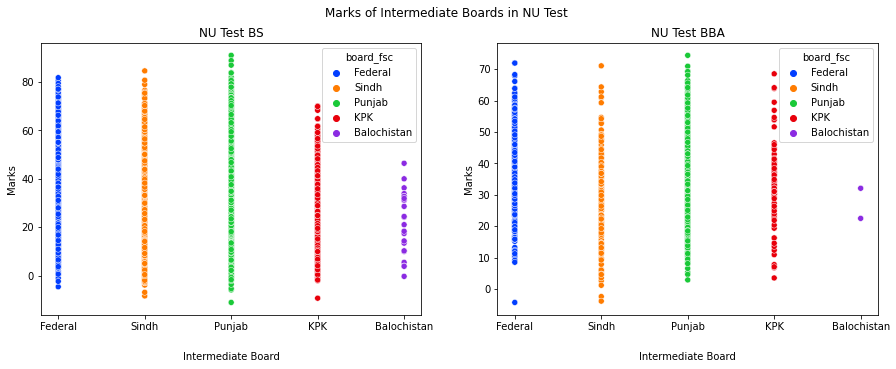

In [10]:
board=admission[['board_fsc','nu_test_bs','nu_test_bba']].copy()
board.dropna(subset=['board_fsc'],inplace=True) #Dropping NAN values of Intermediate Board
board.dropna(subset=['nu_test_bs','nu_test_bba'],how='all',inplace=True) #Dropping those who didnt give any NU Test
board = board[board.board_fsc != 'Cambridge'] #Dropping Cambridge, London, Armed Forces, and Other boards, as we only
                                              #want Provincial Boards
board = board[board.board_fsc != 'London']
board = board[board.board_fsc != 'Armed Forces']
board = board[board.board_fsc != 'Others']
board['board_fsc'].replace(['Faislabad','Rawalpindi','Lahore','Gujranwala','Bahawalpur','Sahiwal','Multan','Sargodha',
                           'Punjab Technical','D.I.Khan','D.G.Khan','Sialkot'],
                           'Punjab',inplace=True) #Mapping to Punjab Province
board['board_fsc'].replace(['Karachi','Agha Khan','Mirpur Khas','Sukkur','Larkana','Hyderabad','Sindh Technical'],'Sindh',
                           inplace=True) #Mapping to Sindh Province
board['board_fsc'].replace(['Abbotabad','Peshawar','Mirpur','Mardan','Sawat','Kohat','Malakand Div','Bannu'],'KPK',
                           inplace=True) #Mapping to KPK Province
board['board_fsc'].replace('Quetta','Balochistan',inplace=True) #Mapping to Balochistan Province

pun_bs=board[board['board_fsc']=='Punjab']
pun_bs=pun_bs[pun_bs['nu_test_bs']==pun_bs['nu_test_bs'].max()]
pun_bba=board[(board['board_fsc']=='Punjab')]
pun_bba=pun_bba[pun_bba['nu_test_bba']==pun_bba['nu_test_bba'].max()]

sin_bs=board[board['board_fsc']=='Sindh']
sin_bs=sin_bs[sin_bs['nu_test_bs']==sin_bs['nu_test_bs'].max()]
sin_bba=board[(board['board_fsc']=='Sindh')]
sin_bba=sin_bba[sin_bba['nu_test_bba']==sin_bba['nu_test_bba'].max()]

fed_bs=board[board['board_fsc']=='Federal']
fed_bs=fed_bs[fed_bs['nu_test_bs']==fed_bs['nu_test_bs'].max()]
fed_bba=board[(board['board_fsc']=='Federal')]
fed_bba=fed_bba[fed_bba['nu_test_bba']==fed_bba['nu_test_bba'].max()]

bal_bs=board[board['board_fsc']=='Balochistan']
bal_bs=bal_bs[bal_bs['nu_test_bs']==bal_bs['nu_test_bs'].max()]
bal_bba=board[(board['board_fsc']=='Balochistan')]
bal_bba=bal_bba[bal_bba['nu_test_bba']==bal_bba['nu_test_bba'].max()]

kpk_bs=board[board['board_fsc']=='KPK']
kpk_bs=kpk_bs[kpk_bs['nu_test_bs']==kpk_bs['nu_test_bs'].max()]
kpk_bba=board[(board['board_fsc']=='KPK')]
kpk_bba=kpk_bba[kpk_bba['nu_test_bba']==kpk_bba['nu_test_bba'].max()]

val_bs = fed_bs.append([sin_bs,pun_bs,kpk_bs,bal_bs])
val_bba=fed_bba.append([sin_bba,pun_bba,kpk_bba,bal_bba])


fig = px.bar(val_bs, x='board_fsc',y='nu_test_bs',color='board_fsc')
fig1 = px.bar(val_bba, x='board_fsc',y='nu_test_bba',color='board_fsc')

pun_bs=board[board['board_fsc']=='Punjab']
mean=pun_bs['nu_test_bs'].mean()
pun_bs=pun_bs[pun_bs['nu_test_bs']==pun_bs['nu_test_bs'].max()]
pun_bs['nu_test_bs'].replace(pun_bs['nu_test_bs'].max(),mean,inplace=True)
pun_bba=board[(board['board_fsc']=='Punjab')]
mean=pun_bba['nu_test_bba'].mean()
pun_bba=pun_bba[pun_bba['nu_test_bba']==pun_bba['nu_test_bba'].max()]
pun_bba['nu_test_bba'].replace(pun_bba['nu_test_bba'].max(),mean,inplace=True)

sin_bs=board[board['board_fsc']=='Sindh']
mean=sin_bs['nu_test_bs'].mean()
sin_bs=sin_bs[sin_bs['nu_test_bs']==sin_bs['nu_test_bs'].max()]
sin_bs['nu_test_bs'].replace(sin_bs['nu_test_bs'].max(),mean,inplace=True)
sin_bba=board[(board['board_fsc']=='Sindh')]
mean=sin_bba['nu_test_bba'].mean()
sin_bba=sin_bba[sin_bba['nu_test_bba']==sin_bba['nu_test_bba'].max()]
sin_bba['nu_test_bba'].replace(sin_bba['nu_test_bba'].max(),mean,inplace=True)

fed_bs=board[board['board_fsc']=='Federal']
mean=fed_bs['nu_test_bs'].mean()
fed_bs=fed_bs[fed_bs['nu_test_bs']==fed_bs['nu_test_bs'].max()]
fed_bs['nu_test_bs'].replace(fed_bs['nu_test_bs'].max(),mean,inplace=True)
fed_bba=board[(board['board_fsc']=='Federal')]
mean=fed_bba['nu_test_bba'].mean()
fed_bba=fed_bba[fed_bba['nu_test_bba']==fed_bba['nu_test_bba'].max()]
fed_bba['nu_test_bba'].replace(fed_bba['nu_test_bba'].max(),mean,inplace=True)

bal_bs=board[board['board_fsc']=='Balochistan']
mean=bal_bs['nu_test_bs'].mean()
bal_bs=bal_bs[bal_bs['nu_test_bs']==bal_bs['nu_test_bs'].max()]
bal_bs['nu_test_bs'].replace(bal_bs['nu_test_bs'].max(),mean,inplace=True)
bal_bba=board[(board['board_fsc']=='Balochistan')]
mean=bal_bba['nu_test_bba'].mean()
bal_bba=bal_bba[bal_bba['nu_test_bba']==bal_bba['nu_test_bba'].max()]
bal_bba['nu_test_bba'].replace(bal_bba['nu_test_bba'].max(),mean,inplace=True)

kpk_bs=board[board['board_fsc']=='KPK']
mean=kpk_bs['nu_test_bs'].mean()
kpk_bs=kpk_bs[kpk_bs['nu_test_bs']==kpk_bs['nu_test_bs'].max()]
kpk_bs['nu_test_bs'].replace(kpk_bs['nu_test_bs'].max(),mean,inplace=True)
kpk_bba=board[(board['board_fsc']=='KPK')]
mean=kpk_bba['nu_test_bba'].mean()
kpk_bba=kpk_bba[kpk_bba['nu_test_bba']==kpk_bba['nu_test_bba'].max()]
kpk_bba['nu_test_bba'].replace(kpk_bba['nu_test_bba'].max(),mean,inplace=True)

val_bs = fed_bs.append([sin_bs,pun_bs,kpk_bs,bal_bs])
val_bba=fed_bba.append([sin_bba,pun_bba,kpk_bba,bal_bba])

fig2 = px.bar(val_bs, x='board_fsc',y='nu_test_bs',color='board_fsc')
fig3 = px.bar(val_bba, x='board_fsc',y='nu_test_bba',color='board_fsc')


figure1_traces = []
figure2_traces = []
for trace in range(len(fig["data"])):
    figure1_traces.append(fig["data"][trace])
for trace in range(len(fig1["data"])):
    figure2_traces.append(fig1["data"][trace])
this_figure = sp.make_subplots(rows=1, cols=2,subplot_titles=["NU BS","NU BBA"],y_title="Marks",
                               x_title="Max Marks in NU Test of Intermediate Boards")
for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row=1, col=2)
this_figure.update_layout(showlegend=False)
this_figure.show()

figure1_traces = []
figure2_traces = []
for trace in range(len(fig2["data"])):
    figure1_traces.append(fig2["data"][trace])
for trace in range(len(fig3["data"])):
    figure2_traces.append(fig3["data"][trace])
this_figure = sp.make_subplots(rows=1, cols=2,subplot_titles=["NU BS","NU BBA"],y_title="Marks",
                               x_title="Average Marks in NU Test of Intermediate Boards")
for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row=1, col=2)
this_figure.update_layout(showlegend=False)
this_figure.show()

palette=sns.color_palette('bright')
fig, ax = plt.subplots(1,2,figsize=[15,5])
fig.suptitle('Marks of Intermediate Boards in NU Test')
sns.scatterplot(data=board[['board_fsc','nu_test_bs']],y='nu_test_bs',x='board_fsc',hue='board_fsc'
            ,palette=palette[0:5],ax=ax[0])
sns.scatterplot(data=board[['board_fsc','nu_test_bba']],y='nu_test_bba',x='board_fsc',hue='board_fsc'
            ,palette=palette[0:5],ax=ax[1])
ax[0].set(ylabel='Marks')
ax[1].set(ylabel='Marks')
ax[0].set_xlabel("Intermediate Board",labelpad=20)
ax[1].set_xlabel("Intermediate Board",labelpad=20)
ax[0].set_title("NU Test BS")
ax[1].set_title("NU Test BBA");

### Punjab Intermediate Board obtained the highest marks in both the NU BS and NU BBA test. However, if one was to look at the average marks obtained by the respective boards, the Federal Board tops the Punjab board and comes out on top (in both the tests i-e NU BS and NU BBA), albeit with a smaller margin. Even though Punjab Board had the highest mars, Federal Board showed more consistency, hence we can say that Federal Board scored the best in the NU Tests.

### There seems to be a correlation between the Board and the Performance in the NU Test, as displayed by the two above Scatter Plots. Candidates in Punjab and Federal Boards tend to score on the higher side, while candidates in Sindh and Balochistan Board score considerably lower, while candidates from Sindh and KPK are in between Federal, Punjab and Balochistan

<br><br><br>

# Question 9. It was commonly believed that NU gives admission to students with at least 70% marks in F.Sc. Do you concur with this hypothesis based on the given data?

In [11]:
def fun(bs,bba): #Function to map nu bba vals to NaN bs vals
    if np.isnan(bs):
        return bba
    else:
        return bs
    

fsc=admission[['total_ssc','obtained_ssc','nu_test_bs','nu_test_bba','nu_merit_bba/bs(af)',
               'nu_merit_bs','admission_discipline']].copy()
fsc.dropna(subset=['nu_test_bs','nu_test_bba'],how='all',inplace=True) #Dropping those applicants who didnt give any NU Test
fsc['ssc']=(fsc['obtained_ssc']/fsc['total_ssc'])*100
fsc['nu_test'] = fsc.apply(lambda x: fun(x['nu_test_bs'],x['nu_test_bba']),axis=1) #Mapping nu test values, if bs test column 
                                                                                   #is null, we take bba test column instead
fsc['nu_merit'] = fsc.apply(lambda x: fun(x['nu_merit_bs'],x['nu_merit_bba/bs(af)']),axis=1) #Mapping nu test values, if bs test
                                                                                             #column is null, we take bba test
                                                                                             #column instead
fsc.drop(['nu_test_bba','nu_test_bs','nu_merit_bs','nu_merit_bba/bs(af)','obtained_ssc','total_ssc'],axis=1,inplace=True)
fsc['fsc']=abs(((10*fsc['nu_merit'])-(5*fsc['nu_test'])-fsc['ssc'])/(4))#Deriving F.Sc results from the formula that NUCES uses,
                                                                        #50% to NU Test, 40% to F.Sc, 10% to S.Sc
fsc=fsc[fsc['admission_discipline']!=-1] #Filtering out only those applicants which got admission in FAST  
seventy=fsc[fsc['fsc']>=70].shape[0] #Count of only those that got admission in FAST,                                                                      #who got good marks in Matric/O-Level
not_seventy=fsc.shape[0]-seventy #Count of only those that got admission in FAST, who did not get good marks in Matric/O-Level
data=[seventy,not_seventy]

fig = go.Figure(data=[go.Pie(labels=['>=70% Marks in F.Sc.','<70% Marks in F.Sc.'], values=data,
                             title="Students who got admission in FAST, separated by F.Sc. result")])
fig.show()

### While it is somewhat true that NU gives admission to students with atleast 70% marks in F.Sc. (as evidenced by the above pie chart where 69.7% of applicants who got into NUCES had atleast 70% marks in F.Sc), it isn't anything steadfast, as a substantial amount of people who got into NUCES (30.3%) had less than 70% marks in F.Sc.
###### Assumption:- Since F.Sc. marks data is wrong in the provided .xlsx file (as it is an exact copy of S.Sc. marks), we can derive the F.Sc. marks from the applicants NU Merit. In 2019, NUCES used the following formula for calculating a students merit: 50% weightage to NU Test, 40% weightage to F.Sc. marks, and 10% weightage to S.Sc. marks. Since we have a students NU Merit, we can use this to derive an applicants F.Sc. marks

<br><br><br>

# Question 10. Administration was told that all applicants given admission in NU had scored more than 50% in NU test. Administration is skeptical about this claim. Can you accept or reject it based on the given data?

In [12]:
def fun(bs,bba): #Function to map nu bba vals to NaN bs vals
    if np.isnan(bs):
        return bba
    else:
        return bs
    
nu=admission[['nu_test_bs','nu_test_bba','admission_discipline']]
nu=nu[nu['admission_discipline']!=-1]
nu.dropna(subset=['nu_test_bs','nu_test_bba'],how='all',inplace=True) #Dropping those applicants who didnt give any NU Test,
                                                                      #and got into through other means e.g SAT
nu['nu_test'] = nu.apply(lambda x: fun(x['nu_test_bs'],x['nu_test_bba']),axis=1) #Mapping nu test values, if bs test column 
                                                                                 #is null, we take bba test column instead
nu=nu[['nu_test','admission_discipline']]

fifty=nu[nu['nu_test']>50].shape[0] #Count of only those that got admission in FAST,                                                                      #who got good marks in Matric/O-Level
not_fifty=nu.shape[0]-fifty #Count of only those that got admission in FAST, who did not get good marks in Matric/O-Level
data=[fifty,not_fifty]

fig = go.Figure(data=[go.Pie(labels=['>50% in NU Test','<=50% in NU Test'], values=data,
                             title="Students who got admission in FAST, separated by NU Test Marks",pull=(0.1,0))])
fig.show()

### I'll reject the claim stating that all applicants given admission in NU scored more than 50% in NU Test, as the above Pie Chart clearly shows that the majority of applicants who got admission in NU (58.1%) scored less than 50% marks in NU Test

<br><br><br>

<br><br><br>

# Questions (10): These marks will be awarded to the student who has identified two more important/interesting questions (other than above 10 questions) and answers them. We shall decide the importance of the question(s) raised.

<br><br><br>
### Question: Do the students who could not get the first preference of their choice of CAMPUS failed to join NUCES?

In [13]:
campus=admission.copy()
campus=campus[['l','campus_1','nts_admission_offer_campus','nu_admission_offer_campus','admission_campus',
                       'admission_discipline']]
campus.dropna(subset=['campus_1'],how='all',inplace=True) #Dropping those who didnt specify a 1st campus preference
campus.dropna(subset=['nu_admission_offer_campus','nts_admission_offer_campus'],how='all',inplace=True) #Only looking at
                                                                                                        #applicants who
                                                                                                        #secured admission
                                                                                                        #at some campus
campus['nu_admission_offer_campus'].replace('FSD','CFD',inplace=True) #FIXING DISCREPANCY IN DATA, AS IN
                                                                      #ADMISSION_OFFER_CAMPUS COLUMNS,
                                                                      #CHINIOT CAMPUS IS WRITTEN AS FSD,
                                                                      #WHILE IN STUDENTS PREFERENCE ITS SHOWN AS CFD,
                                                                      #SO REPLACING FSD WITH CFD TO AVOID DISCREPANCY,
                                                                      #AS BOTH CFD AND FSD CAMPUSES ARE SAME
campus['nts_admission_offer_campus'].replace('FSD','CFD',inplace=True) #Doing the same for this as above


campus = campus[(campus['nu_admission_offer_campus']!=campus['campus_1'])
             & (campus['nts_admission_offer_campus']!=campus['campus_1'])] #FILTERING OUT THOSE WHO GOT OFFER IN CAMPUS
                                                                           #OTHER THAN THEIR MAIN ONE
    
admission_count=campus[campus['admission_discipline']!=-1].shape[0]
not_admission_count=campus[campus['admission_discipline']==-1].shape[0]


data = [admission_count,not_admission_count]
labels = ['Got Admission','Did not get Admission']


fig = go.Figure(data=[go.Pie(labels=labels, values=data,
                             title="Students who got admission if they did not get first preference of campus")])
fig.show()

### As Evidenced by the above Pie Chart, students who did not get admission in their first preference of campus (but got admission in some other campus), generally opted to get admission that campus. Out of all the applicants who could not get admission in their first preference of campus (but got admission in some other campus), more than 50% of them opted to get admission in some other campus


<br><br><br>
### Question: Do O-Level students score higher on NU Test as compared with Matric students?

In [14]:
def fun(bs,bba): #Function to map nu bba vals to NaN bs vals
    if np.isnan(bs):
        return bba
    else:
        return bs

nu_marks=admission[['degree_ssc','nu_test_bs','nu_test_bba']].copy()
nu_marks.dropna(subset=['nu_test_bs','nu_test_bba'],how='all',inplace=True) #Dropping those applicants who didnt give any test
nu_marks['nu_test'] = nu_marks.apply(lambda x: fun(x['nu_test_bs'],x['nu_test_bba']),axis=1) #Mapping nu test values, if
                                                                                             #bs test column is null,
                                                                                             #we take bba test column instead
nu_marks.drop(['nu_test_bs','nu_test_bba'],axis=1,inplace=True)
nu_marks.replace('SSC','Matric',inplace=True)

fig = px.box(nu_marks, y="nu_test", color="degree_ssc",labels={'nu_test':'NU Test Marks'})
fig.show()

### As shown by the above Box Plots, O-Level students tend to score higher in the NU Test as compared to Matric students (average of 43, compared with 34 of Matric students, almost a full 10 points ahead), even though Matric students had a higher maximum number of marks. Moreover, Matric students had more outliers in the data, whereas marks of O-Level students in the NU Test are generally less 'unstable', as can be seen clearly in the Box Plot